In [18]:
# Logistic Regression

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
)

In [20]:
#Get data from pre processing
data = np.load("brain_mri_preprocessed.npz")

#Data
X_train, y_train = data["X_train"], data["y_train"]
X_test, y_test = data["X_test"], data["y_test"]

#Flatten data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Print flatten data
print("Train shape:", X_train_flat.shape)
print("Test shape:", X_test_flat.shape)

Train shape: (5521, 16384)
Test shape: (1205, 16384)


In [21]:
#Log Reg with lbfgs
log_reg = LogisticRegression(max_iter=5000, solver='liblinear')
log_reg.fit(X_train_flat, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

In [22]:
y_pred = log_reg.predict(X_test_flat)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9934

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       309
           1       1.00      0.99      1.00       896

    accuracy                           0.99      1205
   macro avg       0.99      0.99      0.99      1205
weighted avg       0.99      0.99      0.99      1205



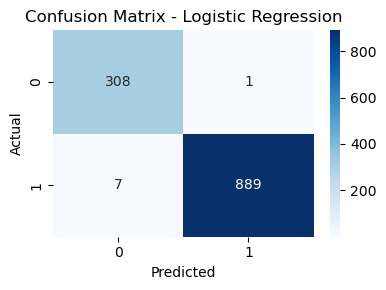

In [23]:
#see where model is mistaken -> lines (actual), columns (predicted), see how much the model got right
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

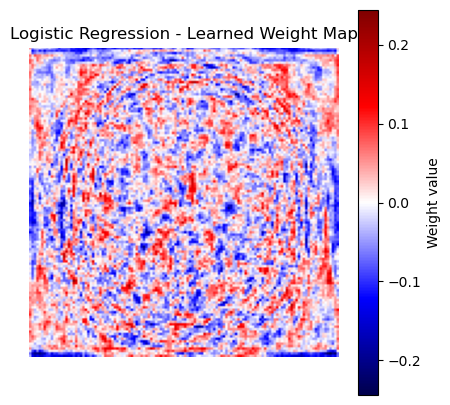

In [24]:
#heat map to analyze how the model sees the images  [tumor (red), and no tumor (blue)]
weights = log_reg.coef_.reshape(128, 128)
plt.figure(figsize=(5,5))
plt.imshow(weights, cmap='seismic', vmin=-np.max(abs(weights)), vmax=np.max(abs(weights)))
plt.colorbar(label="Weight value")
plt.title("Logistic Regression - Learned Weight Map")
plt.axis('off')
plt.show()

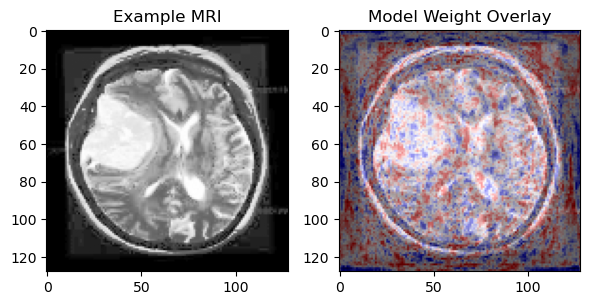

In [25]:
#where the model associates tumor (red), and no tumor (blue)
example = X_test[0] if X_test.ndim == 3 else X_test_flat[0].reshape(128, 128)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(example, cmap='gray')
plt.title("Example MRI")

plt.subplot(1,2,2)
plt.imshow(example, cmap='gray')
plt.imshow(weights, cmap='seismic', alpha=0.4)
plt.title("Model Weight Overlay")
plt.tight_layout()
plt.show()

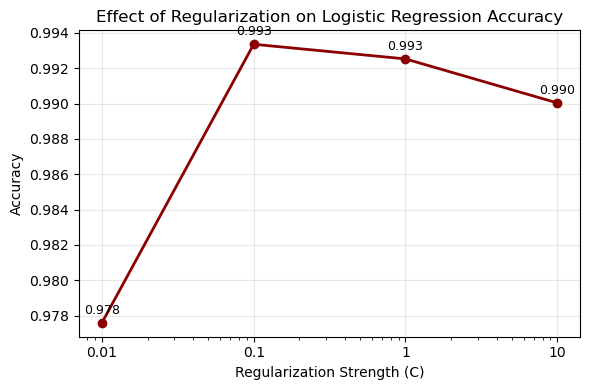

In [26]:
C_values = [0.01, 0.1, 1, 10]
acc_list = []

for C in C_values:
    model = LogisticRegression(C=C, solver='lbfgs', max_iter=500)
    model.fit(X_train_flat, y_train)
    acc = model.score(X_test_flat, y_test)
    acc_list.append(acc)

plt.figure(figsize=(6,4))
plt.plot(C_values, acc_list, marker='o', color='darkred', linewidth=2)
plt.xscale('log')
plt.xticks(C_values, C_values)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization on Logistic Regression Accuracy')
plt.grid(alpha=0.3)
for i, acc in enumerate(acc_list):
    plt.text(C_values[i], acc + 0.0005, f"{acc:.3f}", ha='center', fontsize=9)
plt.tight_layout()
plt.show()

🚀 Starting solver comparison...

✅ Accuracy=0.978er=lbfgs      | C=0.01 ... 
✅ Accuracy=0.993er=lbfgs      | C=0.1  ... 
✅ Accuracy=0.993er=lbfgs      | C=1    ... 
✅ Accuracy=0.990er=lbfgs      | C=10   ... 
✅ Accuracy=0.978er=liblinear  | C=0.01 ... 
✅ Accuracy=0.993er=liblinear  | C=0.1  ... 
✅ Accuracy=0.993er=liblinear  | C=1    ... 
✅ Accuracy=0.993er=liblinear  | C=10   ... 
✅ Accuracy=0.978er=sag        | C=0.01 ... 
✅ Accuracy=0.993er=sag        | C=0.1  ... 
✅ Accuracy=0.993er=sag        | C=1    ... 
✅ Accuracy=0.993er=sag        | C=10   ... 
✅ Accuracy=0.978er=saga       | C=0.01 ... 
✅ Accuracy=0.993er=saga       | C=0.1  ... 
✅ Accuracy=0.993er=saga       | C=1    ... 
✅ Accuracy=0.993er=saga       | C=10   ... 
✅ Accuracy=0.978er=newton-cg  | C=0.01 ... 
✅ Accuracy=0.993er=newton-cg  | C=0.1  ... 
✅ Accuracy=0.993er=newton-cg  | C=1    ... 
✅ Accuracy=0.993er=newton-cg  | C=10   ... 

✅ Successfully trained 20 models.



,Solver,C,Accuracy,Precision,Recall,F1
0,lbfgs,0.10,0.993361,0.998876,0.992188,0.995521
1,sag,1.00,0.993361,0.998876,0.992188,0.995521
2,liblinear,1.00,0.993361,0.998876,0.992188,0.995521
3,liblinear,0.10,0.993361,0.998876,0.992188,0.995521
4,newton-cg,10.00,0.993361,0.998876,0.992188,0.995521
5,newton-cg,1.00,0.993361,0.998876,0.992188,0.995521
6,newton-cg,0.10,0.993361,0.998876,0.992188,0.995521
7,sag,0.10,0.993361,0.998876,0.992188,0.995521
8,sag,10.00,0.993361,0.998876,0.992188,0.995521
9,saga,10.00,0.993361,0.998876,0.992188,0.995521


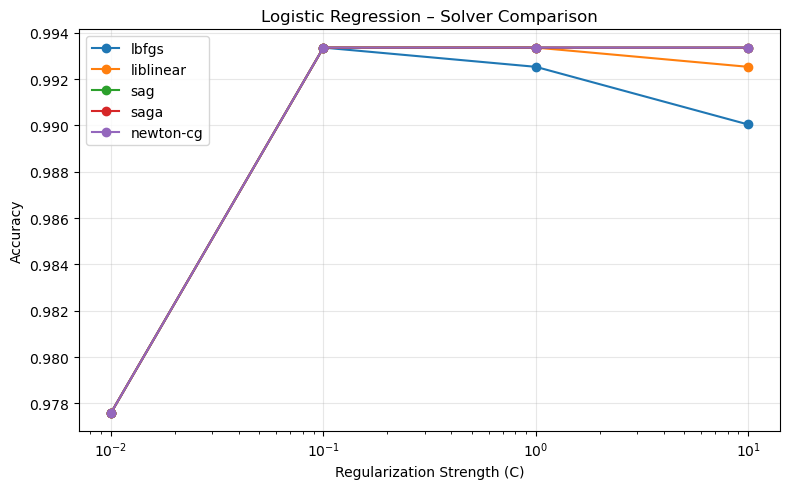

,Accuracy,Precision,Recall,F1
Solver,,,,
lbfgs,0.988,0.999,0.986,0.992
liblinear,0.989,0.999,0.987,0.993
newton-cg,0.989,0.999,0.987,0.993
sag,0.989,0.999,0.987,0.993
saga,0.989,0.999,0.987,0.993


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

solvers = ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg']
C_values = [0.01, 0.1, 1, 10]
results = []

print("🚀 Starting solver comparison...\n")

# train models with different solvers and regularization strengths
for solver in solvers:
    for C in C_values:
        try:
            print(f"🧠 Training solver={solver:<10} | C={C:<4} ...", end=" ")
            model = LogisticRegression(solver=solver, C=C, max_iter=5000)
            model.fit(X_train_flat, y_train)
            y_pred = model.predict(X_test_flat)
            acc = accuracy_score(y_test, y_pred)
            print(f"✅ Accuracy={acc:.3f}")
            results.append({
                "Solver": solver,
                "C": C,
                "Accuracy": acc,
                "Precision": precision_score(y_test, y_pred),
                "Recall": recall_score(y_test, y_pred),
                "F1": f1_score(y_test, y_pred)
            })
        except Exception as e:
            print(f"⚠️ Failed: {e}")

# Check results
if len(results) == 0:
    print("❌ No results recorded! Check for solver issues or dataset mismatch.")
else:
    print(f"\n✅ Successfully trained {len(results)} models.\n")

# 📊 Metrics table
df_results = pd.DataFrame(results)
display(df_results.sort_values("Accuracy", ascending=False).reset_index(drop=True))

# Plot only if we have results
if not df_results.empty:
    plt.figure(figsize=(8,5))
    for solver in solvers:
        subset = df_results[df_results["Solver"] == solver]
        if not subset.empty:
            plt.plot(subset["C"], subset["Accuracy"], marker='o', label=solver)
    plt.xscale("log")
    plt.xlabel("Regularization Strength (C)")
    plt.ylabel("Accuracy")
    plt.title("Logistic Regression – Solver Comparison")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Skipping plot — no valid data to display.")

# 📈 Mean metrics per solver
if not df_results.empty:
    mean_scores = df_results.groupby("Solver")[["Accuracy","Precision","Recall","F1"]].mean().round(3)
    display(mean_scores)


In [28]:
results = {
    "Model": "Logistic Regression (liblinear)",
    "Accuracy": round(acc, 4),
    "Precision": round(prec, 4),
    "Recall": round(rec, 4),
    "F1": round(f1, 4)
}

with open("results_logreg.json", "w") as f:
    json.dump(results, f, indent=4)

print("✅ Saved Logistic Regression results to 'results_logreg.json'")

✅ Saved Logistic Regression results to 'results_logreg.json'
